In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import initial_conditions
from utils import writer
import importlib
importlib.reload(initial_conditions)
importlib.reload(writer)

<module 'utils.writer' from '/home/ray/git-projects/modified_ch/py_dft/utils/writer.py'>

/home/ray/git-projects/modified_ch/py_dft/output/dft_chiN=20.00_delta=0.3900.h5


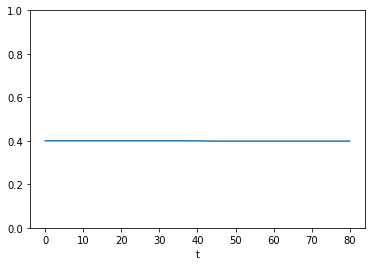

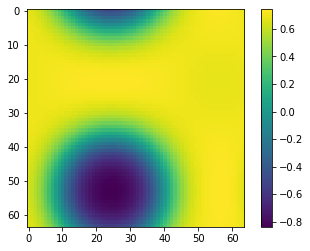

In [72]:
init = initial_conditions.ic()
options = init.options

prefix = options['prefix']
chiN = options['chiN']
delta = options['delta']
it = options['it']
dt = options['dt']

lv = int(it/100)
         
io = utils.writer.writer(prefix,chiN,delta)
# print(io.path)
# io.path = io.get_file_path(base_output_folder='./output/')
io.path = io.get_file_path('/home/ray/git-projects/modified_ch/py_dft/output/')
print(io.path)
its = np.arange(0,it,lv)

t = np.arange(0,it/lv)*dt*lv

# arr = io.get_dataset('energy', 1000)
# print(arr)

energy = []
for it in its:
    arr = io.get_dataset('energy',it)
    energy.append(arr)
    
avg_conc = []
for it in its:
    arr = io.get_dataset('avg_conc',it)
    avg_conc.append(arr)
    
# print(energy)
# print(options['delta'])
    
fig2 = plt.figure()
plt.xlabel('t')
plt.plot(t,avg_conc)
plt.plot(t,energy)
plt.ylim([0,1])
plt.show()

order_param = io.get_dataset('order_parameter',options['it']-1)
fig = plt.figure()
plt.imshow(order_param)
plt.colorbar()
plt.show()

In [ ]:
L = 2.0 * np.pi
Nx = 64
h = L/Nx
dx = np.linspace(0,L,Nx)

xx, yy = np.meshgrid(dx,dx)

cc = np.cos(xx)
plt.imshow(cc)
plt.colorbar()

[-1.00000000e+00 -9.99310523e-01 -9.97243516e-01 -9.93803247e-01
 -9.88996830e-01 -9.82834225e-01 -9.75328237e-01 -9.66494516e-01
 -9.56351560e-01 -9.44920711e-01 -9.32226155e-01 -9.18294927e-01
 -9.03156906e-01 -8.86844816e-01 -8.69394227e-01 -8.50843555e-01
 -8.31234061e-01 -8.10609853e-01 -7.89017884e-01 -7.66507951e-01
 -7.43132698e-01 -7.18947615e-01 -6.94011037e-01 -6.68384145e-01
 -6.42130965e-01 -6.15318369e-01 -5.88016074e-01 -5.60296645e-01
 -5.32235489e-01 -5.03910861e-01 -4.75403861e-01 -4.46798435e-01
 -4.18181374e-01 -3.89642314e-01 -3.61273740e-01 -3.33170977e-01
 -3.05432201e-01 -2.78158431e-01 -2.51453531e-01 -2.25424213e-01
 -2.00180031e-01 -1.75833389e-01 -1.52499534e-01 -1.30296558e-01
 -1.09345400e-01 -8.97698451e-02 -7.16965226e-02 -5.52549080e-02
 -4.05773225e-02 -2.77989328e-02 -1.70577513e-02 -8.49463589e-03
 -2.25329024e-03  1.51973648e-03  2.67504948e-03  1.06040831e-03
 -3.47927307e-03 -1.11019263e-02 -2.19683287e-02 -3.62421031e-02
 -5.40897181e-02 -7.56804

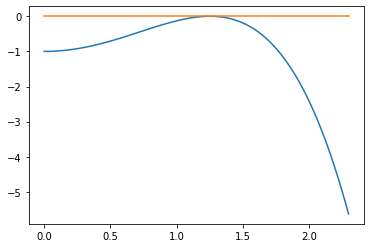

8.664631244448815
23.60876897133221
16.818665999999997


In [34]:
ubar = 0.4
delta = 0.407
fa = 0.30

def func(x):
    return -delta * x**4 + delta**(-1) * x**2 * (1. - 3. * ubar**2) - 1.
    
xx = np.linspace(0,2.3,100)
# print(xx)


plt.plot(xx, func(xx))
print(func(xx))
plt.plot(xx, np.zeros_like(xx))
plt.show()

chiN_crit = ( (3/64)**(1/3) * 1. / (delta * fa * (1. - fa)) )**(3/2)
print(chiN_crit)
Cy = 14. / (1. - delta)
print(Cy)
chiN_guess = 28.362 * (1. - delta)
print(chiN_guess)

In [ ]:
0.3*2-1